In [1]:
#  импортируем необходимые модули
import os
import numpy as np
import pandas as pd

In [2]:
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras.optimizers import RMSprop, Adam

In [3]:
train_gen = ImageDataGenerator(rescale=1./255,         #делаем масштабирование каждого пикселя в диапазон 0-1
                               rotation_range=50,      #слуайным образом картинка будет поворачиваться на 50 градусов, это даст
                                                       #больший эффект при обучении
                               width_shift_range=0.2,  #делаем случайный сдвиг по ширине на 20% пикселов максимум
                               height_shift_range=0.2, #делаем случайный сдвиг по высоте на 20% пикселов максимум
                               zoom_range=0.2)         #делаем случайное увеличение

In [4]:
validation_gen = ImageDataGenerator(rescale = 1./255,
                                    validation_split = 0.3)

In [5]:
#  припишем пути где хранятся наборы данных
train_dir = os.path.join(os.getcwd(), "..", "data", "Final_project", "train")
test_dir = os.path.join(os.getcwd(), "..", "data", "Final_project", "test")

In [6]:
#  обучим итератор на траин выборке
train_datagen = train_gen.flow_from_directory(train_dir, 
                                              target_size=(48, 48), 
                                              batch_size=64,
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              seed=42)

Found 28709 images belonging to 7 classes.


In [7]:
#  добавим валидацию от тестовой выборки
valid_datagen = validation_gen.flow_from_directory(test_dir,
                                                   target_size=(48,48),
                                                   batch_size=64,
                                                   color_mode="grayscale",
                                                   class_mode="categorical",
                                                   subset="validation")

Found 2151 images belonging to 7 classes.


In [47]:
#  делаем модель....тут уже окончательная модель описана (face_recognition_v4), которую я выбрал на Step_2. Но остальные модели
#  так же сохранены и их архитектуру можно посмотреть.
model = models.Sequential()

In [48]:
model.add(layers.Conv2D(8, (5, 5),                #  задаем первый сверточный слой с 8 филтрами размера 5х5
                        activation="relu",        #  активация везде relu кроме последнего слоя с softmax
                        input_shape=(48, 48, 1),  #  входящие изображения размерм 48х48 с одним каналом цвета
                        padding="same"))          #  не увеличиваем размерность исходной фотографии 
model.add(layers.BatchNormalization())            #  нормализация полученных данных
model.add(layers.MaxPool2D(pool_size=(3, 3)))     #  слой выбора максимального пиксела

In [49]:
model.add(layers.Conv2D(64,(3, 3),                #  все тоже самое, только меньшаем окно свертки и увеличиваем количество фильтров
                        padding='same', 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(3, 3)))
# model.add(layers.Dropout(0.2))

In [50]:
model.add(layers.Conv2D(256,(2, 2), 
                        padding='same', 
                        activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

In [51]:
# model.add(layers.Conv2D(256,(2,2), 
#                         padding='same', 
#                         activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.2))

In [52]:
# model.add(layers.Conv2D(512,(2, 2), 
#                         padding='same', 
#                         activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(layers.MaxPool2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.2))

In [53]:
model.add(layers.Flatten())                    #  приводим матрицы к одномерноу массиву
model.add(layers.Dense(1024,                   #  начинаем полносвязные слои 
                       activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))                 

In [54]:
model.add(layers.Dense(512, 
                       activation="relu",
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))

In [55]:
model.add(layers.Dense(64, 
                       activation="relu",
                       kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))

In [56]:
model.add(layers.Dense(7, 
                       activation="softmax",
                       kernel_regularizer=regularizers.l2(0.2)))

In [59]:
model.compile(optimizer = Adam(lr=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 48, 48, 8)         208       
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 8)         32        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        4672      
_________________________________________________________________
batch_normalization_11 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 256)        

In [61]:
history = model.fit(x=train_datagen,
                    epochs = 100,
                    validation_data=valid_datagen)

Epoch 1/100
449/449 [==============================] - 125s 278ms/step - loss: 4.5244 - accuracy: 0.2477 - val_loss: 1.9791 - val_accuracy: 0.2478
Epoch 2/100
449/449 [==============================] - 146s 326ms/step - loss: 1.8525 - accuracy: 0.2754 - val_loss: 1.7506 - val_accuracy: 0.3324
Epoch 3/100
449/449 [==============================] - 130s 290ms/step - loss: 1.7975 - accuracy: 0.2912 - val_loss: 1.7625 - val_accuracy: 0.3264
Epoch 4/100
449/449 [==============================] - 132s 293ms/step - loss: 1.7710 - accuracy: 0.3060 - val_loss: 1.6789 - val_accuracy: 0.3491
Epoch 5/100
449/449 [==============================] - 116s 259ms/step - loss: 1.7467 - accuracy: 0.3214 - val_loss: 1.6974 - val_accuracy: 0.3371
Epoch 6/100
449/449 [==============================] - 116s 257ms/step - loss: 1.7249 - accuracy: 0.3374 - val_loss: 1.6010 - val_accuracy: 0.4179
Epoch 7/100
449/449 [==============================] - 117s 261ms/step - loss: 1.7052 - accuracy: 0.3523 - val_loss: 1

In [21]:
#  model.save("face_recognition_v1")

In [22]:
# model.save("face_recognition_v2")

In [33]:
# model.save("face_recognition_v3")

In [62]:
model.save("face_recognition_v4")

INFO:tensorflow:Assets written to: face_recognition_v4\assets


In [63]:
#  посмотрим как изменялись метрика и функция потерь при обучении и валидации
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

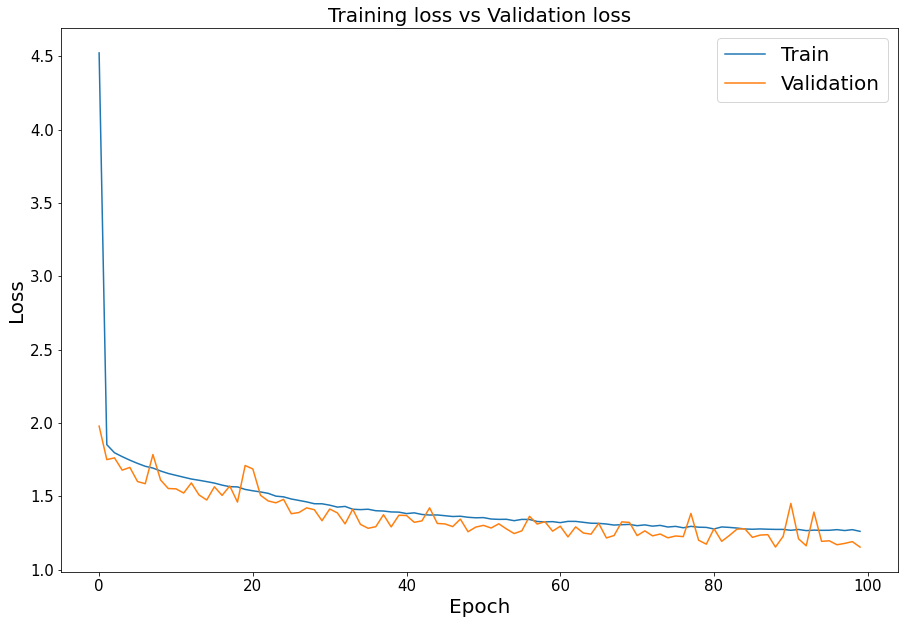

In [68]:
plt.figure(figsize=(15,10))
plt.plot(train_loss, label="Train")
plt.plot(val_loss, label="Validation")
plt.title('Training loss vs Validation loss', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.legend(fontsize=20)
# plt.savefig("Loss_model_v4.jpg")

In [66]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

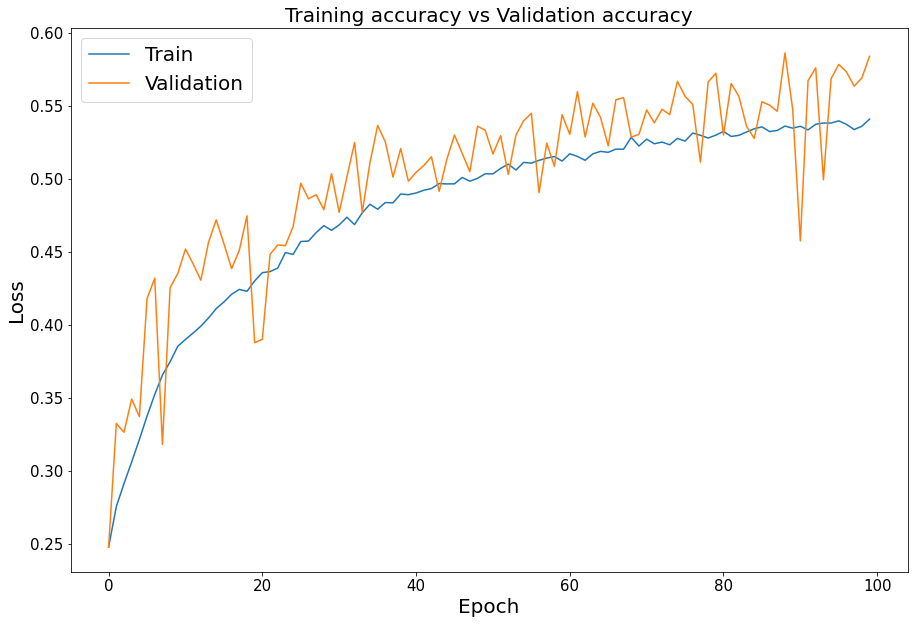

In [69]:
plt.figure(figsize=(15,10))
plt.plot(train_acc, label="Train")
plt.plot(val_acc, label="Validation")
plt.title('Training accuracy vs Validation accuracy', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Epoch', fontsize=20)
plt.xticks(fontsize=15)
plt.legend(fontsize=20)
# plt.savefig("Accuracy_model_v4.jpg")

In [36]:
#  я сделал несколько моделей, которые немного отличаются друг от друга.
#  первые две модели почти одинаковые, различаются только небольшими настройками дропаута и регуляризации и парой фильтров
#  плюс у них разные оптимизаторы
#  третья модель имеет меньшеее количество сверточных слоев, но итоговое количество фильтров перед полносвязанным слоем так же 
#  равно 512... lr у всех трех моделей одинаковый - 0.0001
#  четвертая модель самая маленькая по количеству сверточных слоев и первый полносвязанный слой состоит из 256 нейронов. 
#  Плюс lr по этой модели поставил меньше - 0.001. И в связи с этим увеличил количество эпох до 100 

In [28]:
#  ну ситуация не самая радужная на самом деле. Как видно по графику функции потерь, она сходиться при 10 эпохах.
#  но при этом метрика качества не сходится вообще. И что самое главное оценка на валидационной выборке больше чем оценка 
#  на обучающей.....обычно это говорит о недообучении. В нашем случае мы можем сделать несколько вещей
#  либо увеличить количество фильтров в сворачивающих слоях
#  либо увеличить количество эпох, до тех пор пока кривые по качеству не пересекутся
#  либо можно попробовать увеличить lr.....как одна из проблем, мы задали слишком маленкий рейт при компиляции модели....
#  и из-за этого tf просто не успевает добраться до глобального минимума лосс функции

In [29]:
#  со всеми этими предложениями есть она проблема....поскольку я это все делаю на рабочем компе....который не шибко быстрый.
#  Обучение одной модели занимает у меня полдня миниум....поэтому я для приличия попробую во-первых увеличить lr,
#  скажем сделать его 0.0001, а 0.001.
#  Плюс попробую уменьшить количество дропаутов, возможно я перегнул немного палку с этим.
#  Так же попробую обучить модель с меньшим количеством сверток и слоев, возможно текущая модель так же является слишком сложной
#  для картинок размера 48х48....и в этом проявляется проблема, что нейронка в большей степени обращает внимание на малозначительные
#  факторы, но не берет во внимание обобщающие признаки.

#  так же забегая вперед и оглядываясь на опыт работы с этим датасетом могу сказать что разметка играет существенную роль.
#  по части изображений....модель предсказывала лейблы, которые я как человек тоже бы предсказал....но по разметке, оказывается 
#  все немного по другому. Допустим лейблы 'sad', 'angry'. 'disgusted' и 'fearful' очень сильно похожи друг на друга, 
#  и по некоторым экземплярам как по мне откровенно напутаны....
#  поэтому я бы сам бы поспорил с тем какая эмоция на лице ))

### PS  
чуть выше я скорее больше для себя конспектировал)) но в целом все так и было. Первые модели были с большим количеством слоев и
меньшей lr, в последней модели я выкинул два сверточных слоя и увеличил lr и количество эпох и по факту последняя модель 
получилась самой самой